# DOWNLOAD DATASET

Mengimpor pustaka kagglehub untuk memungkinkan pengunduhan dataset secara langsung dari Kaggle.
Unduh versi terbaru dari “Dataset Rekomendasi Buku” dari Kaggle.
Dengan menggunakan fungsi dataset_download dari kagglehub, kita menentukan dataset dengan pengenal Kaggle-nya.
Fungsi ini mengembalikan jalur ke berkas yang diunduh, yang disimpan dalam variabel `path`.
Mencetak jalur ke berkas dataset untuk memverifikasi unduhan dan mengidentifikasi di mana berkas disimpan secara lokal.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arashnic/book-recommendation-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/arashnic/book-recommendation-dataset/versions/3


# IMPORT LIBRARY

# Dokumentasi Import Library Python

## Import Warning
```python
import warnings
warnings.filterwarnings("ignore")  # Menyembunyikan pesan warning
```

## Library Utama
```python
import pandas as pd      # Manipulasi dan analisis data
import numpy as np      # Komputasi numerik & array
import matplotlib.pyplot as plt  # Visualisasi data
```

## Library Machine Learning & NLP
```python
from sklearn.metrics.pairwise import cosine_similarity  # Menghitung kesamaan kosinus
from sklearn.feature_extraction.text import CountVectorizer  # Konversi teks ke matriks
import nltk  # Natural Language Processing
from nltk.corpus import stopwords  # Daftar kata umum untuk difilter
```

## Library Pendukung
```python
import re          # Regular expression
from PIL import Image   # Manipulasi gambar
import requests    # HTTP requests
import random     # Fungsi random
```

## Instalasi
```bash
pip install pandas numpy matplotlib scikit-learn Pillow requests nltk
```

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import re
from PIL import Image
import requests
import random
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# LOAD DATA


## Tujuan Kode
Kode ini melakukan analisis dasar pada dataset rekomendasi buku yang terdiri dari 3 file CSV: Books, Ratings, dan Users.

## Langkah-Langkah Utama

### 1. Load Data
```python
books = pd.read_csv("Books.csv")
ratings = pd.read_csv("Ratings.csv")
users = pd.read_csv("Users.csv")
```
Membaca 3 dataset utama dari file CSV.

### 2. Eksplorasi Data Awal
- Menampilkan info dan shape dari ketiga dataset
- Memeriksa nilai null pada setiap dataset
- Menghitung jumlah unique User-ID dan ISBN
- Menganalisis distribusi rating buku

### 3. Pembersihan Data
- Menghapus data tahun publikasi yang tidak valid (DK Publishing Inc dan Gallimard)
- Mengubah tipe data 'Year-Of-Publication' menjadi integer
- Menghapus kolom Image-URL yang tidak diperlukan

### 4. Analisis Data Buku
- Menghitung jumlah ISBN unik
- Menghitung jumlah judul buku unik
- Menghitung jumlah penulis unik
- Menghitung jumlah tahun publikasi unik
- Menghitung jumlah penerbit unik

### 5. Visualisasi
- Membuat visualisasi bar plot untuk 10 penulis dengan jumlah buku terbanyak

In [ ]:
books=pd.read_csv("/content/drive/MyDrive/arashnic/book-recommendation-dataset/versions/3/Books.csv")
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
ratings=pd.read_csv("/content/drive/MyDrive/arashnic/book-recommendation-dataset/versions/3/Ratings.csv")
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
users=pd.read_csv("/content/drive/MyDrive/arashnic/book-recommendation-dataset/versions/3/Users.csv")
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
print("Books Describe: " ,books.info())
print("Ratings Shape: " ,ratings.info() )
print("Users Shape: " ,users.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
Books Describe:  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 


In [ ]:
print("Books Shape: " ,books.shape )
print("Ratings Shape: " ,ratings.shape )
print("Users Shape: " ,users.shape )

Books Shape:  (271360, 8)
Ratings Shape:  (1149780, 3)
Users Shape:  (278858, 3)


In [ ]:
print("Any null values in Books:\n" ,books.isnull().sum())
print("Any null values in Ratings:\n ",ratings.isnull().sum())
print("Any null values in Users:\n",users.isnull().sum())

Any null values in Books:
 ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
Any null values in Ratings:
  User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
Any null values in Users:
 User-ID          0
Location         0
Age         110762
dtype: int64


In [ ]:
print('Number of User-IDs:', len(ratings['User-ID'].unique()))
print('Number of books based on ISBN:', len(ratings['ISBN'].unique()))

print('Number of book ratings:')
sorted_ratings = ratings['Book-Rating'].value_counts().sort_index()
pd.DataFrame({'Book-Rating': sorted_ratings.index, 'Sum': sorted_ratings.values})

Number of User-IDs: 105283
Number of books based on ISBN: 340556
Number of book ratings:


,Book-Rating,Sum
0,0,716109
1,1,1770
2,2,2759
3,3,5996
4,4,8904
5,5,50974
6,6,36924
7,7,76457
8,8,103736
9,9,67541


In [ ]:
print('Number of book data:', len(books.ISBN.unique()))
print('Total book rating data from readers:', len(ratings.ISBN.unique()))
print('Amount of user data:', len(users['User-ID'].unique()))

Number of book data: 271360
Total book rating data from readers: 340556
Amount of user data: 278858


## Books Data

In [ ]:
books[(books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [ ]:
# Removing values in 'Year-Of-Publication' that are text.
temp = (books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')
books = books.drop(books[temp].index)
books[(books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [ ]:
# Changing the data type of 'Year-Of-Publication'.
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)
print(books.dtypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int64
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object


In [ ]:
# Removing Image-URL column of all sizes
books.drop(labels=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [ ]:
print("Number of Book ISBN numbers:", len(books['ISBN'].unique()))
print("Number of book titles:", len(books['Book-Title'].unique()))
print('Number of book authors:', len(books['Book-Author'].unique()))
print('Number of Publication Years:', len(books['Year-Of-Publication'].unique()))
print('Number of publisher names:', len(books['Publisher'].unique()))

Number of Book ISBN numbers: 271357
Number of book titles: 242132
Number of book authors: 102021
Number of Publication Years: 116
Number of publisher names: 16805


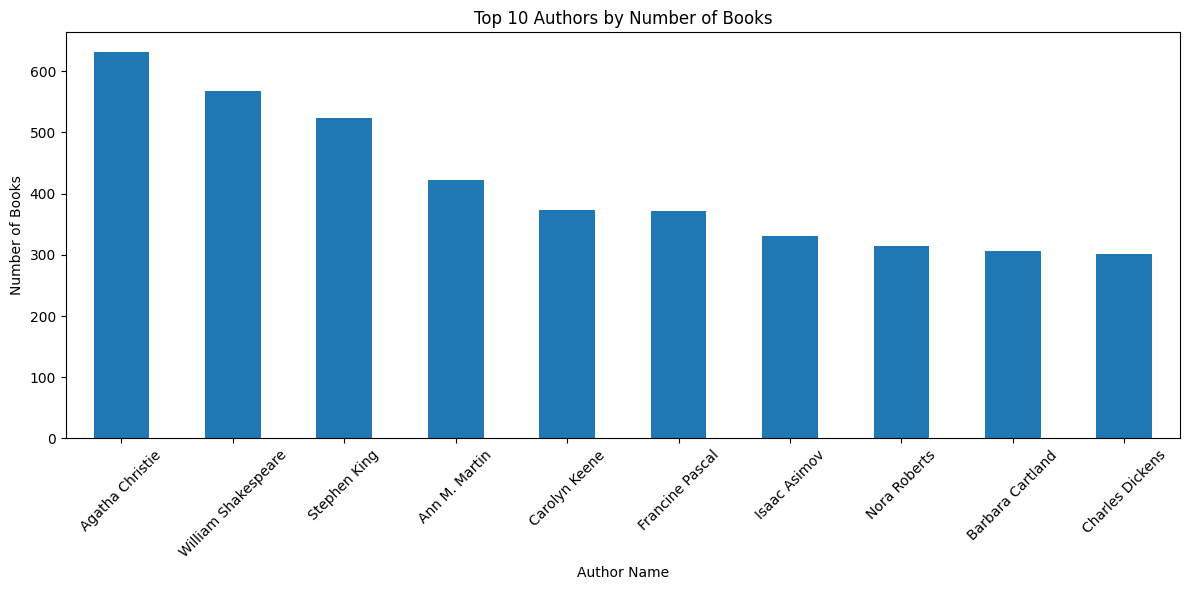

In [ ]:
# Grouping Book-Author' and count the number of books written by each author
author_counts = books.groupby('Book-Author')['Book-Title'].count()

# Sort authors in descending order
sorted_authors = author_counts.sort_values(ascending=False)

# Select the top 10 authors
top_10_authors = sorted_authors.head(10)

# The plot of the top 10 authors and the books written by the authors, then calculated using a bar plot
plt.figure(figsize=(12, 6))
top_10_authors.plot(kind='bar')
plt.xlabel('Author Name')
plt.ylabel('Number of Books')
plt.title('Top 10 Authors by Number of Books')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Ratings Data

In [ ]:
print('Number of User-IDs:', len(ratings['User-ID'].unique()))
print('Number of books based on ISBN:', len(ratings['ISBN'].unique()))

print('Number of book ratings:')
sorted_ratings = ratings['Book-Rating'].value_counts().sort_index()
pd.DataFrame({'Book-Rating': sorted_ratings.index, 'Sum': sorted_ratings.values})

Number of User-IDs: 105283
Number of books based on ISBN: 340556
Number of book ratings:


,Book-Rating,Sum
0,0,716109
1,1,1770
2,2,2759
3,3,5996
4,4,8904
5,5,50974
6,6,36924
7,7,76457
8,8,103736
9,9,67541


In [ ]:
df_rating = ratings[:20000]
df_rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
19995,3757,843222264X,7
19996,3757,8432222658,7
19997,3757,8432222666,7
19998,3757,8432222674,7


## Users Data

In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Based on the information above, there are 278,858 entries and 3 variables: User-ID, which is the unique code for anonymous users; Location, which is the user's location; and Age, which is the user's age. It is also noted that there are some users whose age is not known. User data is useful when creating a recommendation system based on user demographics or social conditions. However, for this case study, user data will not be used in the model. In model development, the data used will be from the "books" and "ratings" datasets.

# DATA PREPARATION

## Merging Files and Determining the Total Number of Ratings

### Penggabungan Dataset
```python
books = pd.merge(ratings, books, on='ISBN', how='left')
```

### Tujuan
- Menggabungkan dataset `ratings` dan `books` menjadi satu DataFrame
- Menggunakan kolom 'ISBN' sebagai kunci penggabungan
- Menggunakan metode 'left join' untuk mempertahankan semua data dari dataset `ratings`

### Hasil
- Dataset baru yang berisi informasi rating beserta detail buku terkait
- Setiap baris akan memiliki data rating dan informasi buku lengkap
- Data yang tidak memiliki pasangan di dataset `books` akan diisi dengan nilai NULL

### Penggunaan
Dataset hasil penggabungan ini akan digunakan untuk analisis lebih lanjut dalam sistem rekomendasi buku.

In [ ]:
# Merging dataframe ratings with books based on ISBN values
books = pd.merge(ratings, books, on='ISBN', how='left')
books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
...,...,...,...,...,...,...,...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books
1149778,276721,0590442449,10,Fourth Grade Rats,Jerry Spinelli,1996.0,Scholastic


In [ ]:
books.groupby('ISBN').sum()

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
ISBN,,,,,,
0330299891,271009,6,0,0,0.0,0
0375404120,356057,3,0,0,0.0,0
0586045007,89192,0,0,0,0.0,0
9022906116,100868,7,0,0,0.0,0
9032803328,89192,0,0,0,0.0,0
...,...,...,...,...,...,...
cn113107,107301,0,0,0,0.0,0
ooo7156103,266146,7,0,0,0.0,0
§423350229,85250,0,0,0,0.0,0


## Data Preparation for Model Development with Content-Based Filtering

## 1. Penanganan Missing Value
```python
books.isnull().sum()
all_books_clean = books.dropna()
```
- Mengecek jumlah nilai yang hilang
- Menghapus baris yang memiliki nilai NULL

## 2. Pengurutan dan Penghapusan Duplikat
```python
fix_books = all_books_clean.sort_values('ISBN', ascending=True)
preparation = fix_books.drop_duplicates('ISBN')
```
- Mengurutkan data berdasarkan ISBN
- Menghapus duplikat ISBN untuk mendapatkan data unik

## 3. Konversi Data ke List
```python
isbn_id = preparation['ISBN'].tolist()
book_title = preparation['Book-Title'].tolist()
book_author = preparation['Book-Author'].tolist()
year_of_publication = preparation['Year-Of-Publication'].tolist()
publisher = preparation['Publisher'].tolist()
```
- Mengkonversi setiap kolom menjadi format list

## 4. Pembuatan DataFrame Baru
```python
books_new = pd.DataFrame({
    'isbn': isbn_id,
    'book_title': book_title,
    'book_author': book_author,
    'year_of_publication': year_of_publication,
    'publisher': publisher
})
```
- Membuat DataFrame baru dengan nama kolom yang lebih sederhana
- Mengambil 20.000 data pertama untuk analisis

### Tujuan Akhir
- Menyiapkan dataset bersih untuk model Content-Based Filtering
- Menghilangkan data duplikat dan missing value
- Menyederhanakan struktur data untuk pemrosesan lebih lanjut

### Handling Missing Value

In [ ]:
# Checking missing value using isnull() function
books.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,118648
Book-Author,118650
Year-Of-Publication,118648
Publisher,118650


In [ ]:
all_books_clean = books.dropna()
all_books_clean

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
...,...,...,...,...,...,...,...
1149774,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998.0,A.R.E. Press (Association of Research &amp; Enlig
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books


In [ ]:
all_books_clean.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0


In [ ]:
# Sort books by ISBN then put them in the fix_books variable
fix_books = all_books_clean.sort_values('ISBN', ascending=True)
fix_books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
703628,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster
357256,86123,0001010565,0,Mog's Christmas,Judith Kerr,1992.0,Collins
866078,209516,0001010565,0,Mog's Christmas,Judith Kerr,1992.0,Collins
103677,23902,0001046438,9,Liar,Stephen Fry,0.0,Harpercollins Uk
807953,196149,0001046713,0,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers
...,...,...,...,...,...,...,...
1100731,264317,B000234N76,0,Falling Angels,Tracy Chevalier,2001.0,E P Dutton
423108,100906,B000234NC6,0,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002.0,Knopf
419279,100088,B00029DGGO,0,"Good Wife Strikes Back, The",Elizabeth Buchan,0.0,Viking Adult
743545,179791,B0002JV9PY,0,The Blockade Runners,Jules Verne,0.0,Digireads.com


In [ ]:
len(fix_books['ISBN'].unique())

270144

In [ ]:
len(fix_books['Book-Title'].unique())

241065

In [ ]:
preparation = fix_books.drop_duplicates('ISBN')
preparation

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
703628,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster
357256,86123,0001010565,0,Mog's Christmas,Judith Kerr,1992.0,Collins
103677,23902,0001046438,9,Liar,Stephen Fry,0.0,Harpercollins Uk
807953,196149,0001046713,0,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers
103678,23902,000104687X,6,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993.0,HarperCollins Publishers
...,...,...,...,...,...,...,...
1100731,264317,B000234N76,0,Falling Angels,Tracy Chevalier,2001.0,E P Dutton
423108,100906,B000234NC6,0,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002.0,Knopf
419279,100088,B00029DGGO,0,"Good Wife Strikes Back, The",Elizabeth Buchan,0.0,Viking Adult
743545,179791,B0002JV9PY,0,The Blockade Runners,Jules Verne,0.0,Digireads.com


In [ ]:
# convert the 'ISBN' data series into list form
isbn_id = preparation['ISBN'].tolist()

# convert the 'Book-Title' data series into list form
book_title = preparation['Book-Title'].tolist()

# convert the 'Book-Author' data series into list form
book_author = preparation['Book-Author'].tolist()

# convert the 'Year-Of-Publication' data series into list form
year_of_publication = preparation['Year-Of-Publication'].tolist()

# convert the 'Publisher' data series into list form
publisher = preparation['Publisher'].tolist()

print(len(isbn_id))
print(len(book_title))
print(len(book_author))
print(len(year_of_publication))
print(len(publisher))

270144
270144
270144
270144
270144


In [ ]:
books_new = pd.DataFrame({
    'isbn': isbn_id,
    'book_title': book_title,
    'book_author': book_author,
    'year_of_publication': year_of_publication,
    'publisher': publisher

})

books_new

,isbn,book_title,book_author,year_of_publication,publisher
0,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster
1,0001010565,Mog's Christmas,Judith Kerr,1992.0,Collins
2,0001046438,Liar,Stephen Fry,0.0,Harpercollins Uk
3,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers
4,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993.0,HarperCollins Publishers
...,...,...,...,...,...
270139,B000234N76,Falling Angels,Tracy Chevalier,2001.0,E P Dutton
270140,B000234NC6,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002.0,Knopf
270141,B00029DGGO,"Good Wife Strikes Back, The",Elizabeth Buchan,0.0,Viking Adult
270142,B0002JV9PY,The Blockade Runners,Jules Verne,0.0,Digireads.com


In [ ]:
books_new = books_new[:20000]
books_new

,isbn,book_title,book_author,year_of_publication,publisher
0,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster
1,0001010565,Mog's Christmas,Judith Kerr,1992.0,Collins
2,0001046438,Liar,Stephen Fry,0.0,Harpercollins Uk
3,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers
4,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993.0,HarperCollins Publishers
...,...,...,...,...,...
19995,0140444696,The Kreutzer Sonata and Other Stories (Penguin...,Leo Tolstoy,1986.0,Penguin Books
19996,014044470X,The Fiancee and Other Stories (Penguin Classics),Anton Pavlovich Chekhov,1986.0,Penguin Books
19997,0140444726,Jacques the Fatalist and His Master (Penguin C...,Denis Diderot,1986.0,Penguin Books
19998,0140444742,Seven Viking Romances (Penguin Classics),Hermann Palsson,1986.0,Penguin Books


## Data Preparation for Model Development with Collaborative Filtering

# Dokumentasi Persiapan Data untuk Collaborative Filtering

## 1. Encoding User-ID
```python
user_ids = df_rating['User-ID'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
```
- Mengkonversi User-ID ke format list unik
- Membuat mapping ID pengguna ke angka terenkripsi
- Membuat mapping balik dari angka terenkripsi ke ID pengguna

## 2. Encoding ISBN
```python
isbn_id = df_rating['ISBN'].unique().tolist()
isbn_to_isbn_encoded = {x: i for i, x in enumerate(isbn_id)}
isbn_encoded_to_isbn = {i: x for i, x in enumerate(isbn_id)}
```
- Mengkonversi ISBN ke format list unik
- Membuat mapping ISBN ke angka terenkripsi
- Membuat mapping balik dari angka terenkripsi ke ISBN

## 3. Mapping Data
```python
df_rating['user'] = df_rating['User-ID'].map(user_to_user_encoded)
df_rating['book_title'] = df_rating['ISBN'].map(isbn_to_isbn_encoded)
```
- Menambahkan kolom user dengan ID terenkripsi
- Menambahkan kolom book_title dengan ISBN terenkripsi

## 4. Pengolahan Rating
```python
df_rating['Book-Rating'] = df_rating['Book-Rating'].values.astype(np.float32)
min_rating = min(df_rating['Book-Rating'])
max_rating = max(df_rating['Book-Rating'])
```
- Mengkonversi rating ke tipe data float
- Menghitung nilai rating minimum dan maksimum

### Hasil Akhir
- Data siap untuk pemodelan Collaborative Filtering
- Rating dalam format numerik
- User-ID dan ISBN dalam format terenkripsi
- Informasi jumlah user, jumlah buku, dan rentang rating

### Tujuan
Mempersiapkan data dalam format yang sesuai untuk model rekomendasi Collaborative Filtering dengan mengenkripsi ID pengguna dan buku serta menstandarisasi format rating.

In [ ]:
# convert User-ID to a list without matching values
user_ids = df_rating['User-ID'].unique().tolist()
print('list userIDs: ', user_ids)

# perform User-ID encoding
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID: ', user_to_user_encoded)

# carry out the process of encoding numbers into User-ID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded number to userID: ', user_encoded_to_user)

list userIDs:  [276725, 276726, 276727, 276729, 276733, 276736, 276737, 276744, 276745, 276746, 276747, 276748, 276751, 276754, 276755, 276760, 276762, 276765, 276768, 276772, 276774, 276780, 276786, 276788, 276796, 276798, 276800, 276803, 276804, 276806, 276808, 276811, 276812, 276813, 276814, 276817, 276820, 276822, 276827, 276828, 276830, 276832, 276833, 276835, 276837, 276838, 276840, 276842, 276847, 276848, 276850, 276852, 276853, 276854, 276856, 276857, 276859, 276861, 276862, 276863, 276866, 276869, 276870, 276872, 276873, 276875, 276878, 276879, 276884, 276887, 276888, 276889, 276890, 276896, 276904, 276905, 276911, 276912, 276915, 276916, 276925, 276927, 276928, 276929, 276934, 276936, 276939, 276943, 276946, 276949, 276950, 276953, 276954, 276957, 276959, 276963, 276964, 276965, 276975, 276981, 276984, 276986, 276988, 276989, 276990, 276992, 276994, 276997, 276998, 277002, 277007, 277009, 277010, 277012, 277018, 277019, 277022, 277023, 277028, 277031, 277032, 277035, 277036, 

In [ ]:
# convert ISBNs to a list without matching values
isbn_id = df_rating['ISBN'].unique().tolist()

# perform ISBN encoding
isbn_to_isbn_encoded = {x: i for i, x in enumerate(isbn_id)}

# carry out the process of encoding numbers to ISBN
isbn_encoded_to_isbn = {i: x for i, x in enumerate(isbn_id)}

In [ ]:
# Disable the SettingWithCopyWarning warning
pd.options.mode.chained_assignment = None # "warn" or "raise" to turn it back on

# Mapping User-ID to user dataframe
df_rating['user'] = df_rating['User-ID'].map(user_to_user_encoded)

# Mapping ISBN to book title dataframe
df_rating['book_title'] = df_rating['ISBN'].map(isbn_to_isbn_encoded)

In [ ]:
# get the number of users
num_users = len(user_to_user_encoded)
print(num_users)

# get the number of book titles
num_book_title = len(isbn_to_isbn_encoded)
print(num_book_title)

# convert the rating to a float value
df_rating['Book-Rating'] = df_rating['Book-Rating'].values.astype(np.float32)

# minimum rating value
min_rating = min(df_rating['Book-Rating'])

# maximum rating value
max_rating = max(df_rating['Book-Rating'])

print('Number of Users: {}, Number of Books: {}, Min Rating: {}, Max Rating: {}'.format(
     num_users, num_book_title, min_rating, max_rating
))

2180
17178
Number of Users: 2180, Number of Books: 17178, Min Rating: 0.0, Max Rating: 10.0


# MODELING

## Model Development with Content-Based Filtering

# Dokumentasi Model Content-Based Filtering

## 1. Persiapan TF-IDF
```python
tf = TfidfVectorizer()
tfidf_matrix = tf.fit_transform(data['book_author'])
```
- Inisialisasi TF-IDF Vectorizer
- Mengubah data penulis buku menjadi matriks TF-IDF
- Menghasilkan representasi numerik dari data teks penulis

## 2. Perhitungan Similarity
```python
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['book_title'], columns=data['book_title'])
```
- Menghitung cosine similarity antar buku
- Membuat DataFrame similarity dengan judul buku sebagai index dan kolom

## 3. Fungsi Rekomendasi
```python
def book_recommendation(book_title, similarity_data=cosine_sim_df, items=data[['book_title', 'book_author']], k=10):
    index = similarity_data.loc[:,book_title].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(book_title, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)
```
Fungsi ini:
- Menerima judul buku sebagai input
- Mencari k buku terdekat berdasarkan similarity
- Mengembalikan rekomendasi k buku yang mirip
- Mengecualikan buku input dari hasil rekomendasi

### Cara Penggunaan
```python
book_title_test = "Entering the Silence : Becoming a Monk and a Writer"
book_recommendation(book_title_test)
```

### Tujuan
- Menghasilkan rekomendasi buku berdasarkan kesamaan penulis
- Menggunakan TF-IDF untuk mengubah data teks menjadi vektor numerik
- Menggunakan cosine similarity untuk mengukur kemiripan antar buku
- Memberikan 10 rekomendasi buku yang paling mirip

### Output
DataFrame berisi judul dan penulis buku yang direkomendasikan berdasarkan kemiripan dengan buku input.

In [ ]:
data = books_new
data.sample(5)

,isbn,book_title,book_author,year_of_publication,publisher
6964,0060913614,Red Sky at Morning,Richard Bradford,1986.0,Harpercollins
11938,0064470598,Jacob Have I Loved,Katherine Paterson,1990.0,HarperTrophy
13361,0091744016,Custer,King,1992.0,Random House (UK)
14338,0133349705,Frommer's Hawaii '92 on $70 a Day (Budget Trav...,Arthur Frommer,1991.0,John Wiley &amp; Sons Inc
606,0006281443,The Puzzle of Ethics,Peter Vardy,1999.0,Fount


### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tf = TfidfVectorizer()

# Perform IDF calculations on book_author data
tf.fit(data['book_author'])

# Mapping array from integer index features to name features
tf.get_feature_names_out()

array(['1988', 'aaron', 'aarons', ..., 'zweifel', 'zwinger', 'â¼nter'],
      dtype=object)

In [ ]:
# Performs a fit and then transforms it into matrix form
tfidf_matrix = tf.fit_transform(data['book_author'])

# View the tfidf matrix size
tfidf_matrix.shape

(20000, 8746)

In [ ]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.book_title
).sample(15, axis=1).sample(10, axis=0)

,theisen,royce,manguel,carmel,fyodor,tan,hauer,cortez,alessandro,tunstead,lurie,francess,sprankle,bretnor,finn
book_title,,,,,,,,,,,,,,,
Olive's Ocean (Newbery Honor Book),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Ascension (Water Trilogy, Book 1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cash: The Autobiography,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mariana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Men Are from Mars, Women Are from Venus: A Practical Guide for Improving Communication and Getting What You Want in Your Relationships",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Kind of Anger,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Beverly Hills 90210: No Secrets (Beverly Hills, 90210)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Scaredy Cat : A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The I.R.A (Fontana paperbacks),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculating cosine similarity on the tf-idf matrix
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# Create a dataframe from the cosine_sim variable with rows and columns in the form of book titles
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['book_title'], columns=data['book_title'])
print('Shape:', cosine_sim_df.shape)

# View the similarity matrix for each book title
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (20000, 20000)


book_title,Ride the Night Wind (Harper Monogram),Spiderweb,"If the Gods Had Meant Us to Vote, They'd Have Given Us Candidates",The Boys of Winter: A Novel,Peanuts: A Golden Celebration : The Art and the Story of the World's Best-Loved Comic Strip
book_title,,,,,
Wediquette: The Answers to All Your Wedding Etiquette Questions,0.0,0.0,0.0,0.0,0.0
Reading As Communication,0.0,0.0,0.0,0.0,0.0
Saints and Strangers (King Penguin),0.0,0.0,0.0,0.0,0.0
Collected stories,0.0,0.0,0.0,0.0,0.0
Is Sex Necessary? : Or Why You Feel the Way You Do,0.0,0.0,0.0,0.0,0.0
The Piano Man's Daughter,0.0,0.0,0.0,0.0,0.0
The Righteous Revenge of Artemis Bonner,0.0,0.0,0.0,0.0,0.0
Heart of the Jaguar,0.0,0.0,0.0,0.0,0.0
Whitefire,0.0,0.0,0.0,0.0,0.0


### Getting Recommendations

In [ ]:
def book_recommendation(book_title, similarity_data=cosine_sim_df, items=data[['book_title', 'book_author']], k=10):
     # Retrieve data by using argpartition to partition indirectly along a given axis
     # Dataframe converted to numpy
     # Range(start, stop, step)
     index = similarity_data.loc[:,book_title].to_numpy().argpartition(range(-1, -k, -1))

     # Retrieve data with the greatest similarity from the existing index
     closest = similarity_data.columns[index[-1:-(k+2):-1]]

     # Drop book_title so that the name of the book you are looking for does not appear in the recommendation list
     closest = closest.drop(book_title, errors='ignore')

     return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
book_title_test = "Entering the Silence : Becoming a Monk and a Writer (The Journals of Thomas Merton, V. 2)" # book title example

data[data.book_title.eq(book_title_test)]

,isbn,book_title,book_author,year_of_publication,publisher
6448,0060654775,Entering the Silence : Becoming a Monk and a W...,Thomas Merton,1997.0,HarperSanFrancisco


In [ ]:
# Get recommendations for similar book titles
book_recommendation(book_title_test)

,book_title,book_author
0,Dancing in the Water of Life: Seeking Peace in...,Thomas Merton
1,Turning Toward the World: The Pivotal Years (T...,Thomas Merton
2,Run to the Mountain : The Story of a VocationT...,Thomas Merton
3,Dialogues with Silence: Prayers and Drawings,Thomas Merton
4,The Other Side of the Mountain: The End of the...,Thomas Merton
5,Learning to Love: Exploring Solitude and Freed...,Thomas Merton
6,Dialogues with Silence : Prayers &amp; Drawings,Thomas Merton
7,The White Hotel,D.M. Thomas
8,The White Hotel,D. M. Thomas
9,The White Hotel,D.M. Thomas


## Model Development with Collaborative Filtering

# Dokumentasi Model Collaborative Filtering

## 1. Split Data Training
```python
x = df_rating[['user', 'book_title']].values
y = df_rating['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Split data 90:10
train_indices = int(0.9 * df_rating.shape[0])
x_train, x_val, y_train, y_val = (x[:train_indices], x[train_indices:],
                                 y[:train_indices], y[train_indices:])
```
- Menyiapkan data input (user dan book_title)
- Normalisasi rating
- Membagi data menjadi training dan validasi

## 2. Model Architecture (RecommenderNet)
```python
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_book_title, embedding_size, dropout_rate=0.2):
        # Inisialisasi layer
        self.user_embedding = layers.Embedding(...)
        self.book_title_embedding = layers.Embedding(...)
        self.dropout = layers.Dropout(...)
```
Komponen utama:
- User embedding layer
- Book title embedding layer
- Dropout layer
- Sigmoid activation

## 3. Training Model
```python
model = RecommenderNet(num_users, num_book_title, 50)
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=1e-4),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 16,
    epochs = 50,
    validation_data = (x_val, y_val)
)
```
- Inisialisasi model dengan embedding size 50
- Menggunakan Binary Cross Entropy loss
- Training selama 50 epochs

## 4. Mendapatkan Rekomendasi
```python
# Mengambil sample user
user_id = df_rating['User-ID'].sample(1).iloc[0]

# Mendapatkan buku yang belum dibaca
book_not_readed = book_df[~book_df['isbn'].isin(book_readed_by_user['ISBN'].values)]['isbn']

# Membuat prediksi
ratings_model = model.predict(user_book_array).flatten()

# Mendapatkan top 10 rekomendasi
top_ratings_indices = ratings_model.argsort()[-10:][::-1]
```

### Output
- Menampilkan 10 buku dengan rating tertinggi dari user
- Menampilkan 10 rekomendasi buku baru untuk user
- Format output dalam DataFrame berisi judul dan penulis buku

### Tujuan
- Membuat sistem rekomendasi berdasarkan pola rating user
- Menggunakan embedding untuk mempelajari representasi user dan buku
- Memberikan rekomendasi personal berdasarkan preferensi user

### Splitting Data for Training and Validation

In [ ]:
df_rating = df_rating.sample(frac=1, random_state=42)
df_rating

,User-ID,ISBN,Book-Rating,user,book_title
10650,446,0061000280,10.0,1005,9861
2041,277478,0340565276,8.0,273,1978
8668,278418,1569751544,3.0,678,8223
1114,277195,0394726413,0.0,173,1098
13902,1928,0373196903,0.0,1511,12430
...,...,...,...,...,...
11284,651,1888451084,7.0,1071,10381
11964,929,0345331605,7.0,1163,10917
5390,278418,0373121962,0.0,678,5066
860,277087,8472230082,5.0,139,850


In [ ]:
# create a variable x to match user data and book title into one value
x = df_rating[['user', 'book_title']].values

# create a y variable to create a rating of the results
y = df_rating['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# divide into 90% train data and 10% validation data

train_indices = int(0.9 * df_rating.shape[0])
x_train, x_val, y_train, y_val = (
     x[:train_indices],
     x[train_indices:],
     y[:train_indices],
     y[train_indices:]
)

print(x, y)

[[ 1005  9861]
 [  273  1978]
 [  678  8223]
 ...
 [  678  5066]
 [  139   850]
 [ 1706 13939]] [1.  0.8 0.3 ... 0.  0.5 0. ]


### Training Process

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
class RecommenderNet(tf.keras.Model):

     # function initialization
     def __init__(self, num_users, num_book_title, embedding_size, dropout_rate=0.2, **kwargs):
         super(RecommenderNet, self).__init__(**kwargs)
         self.num_users = num_users
         self.num_book_title = num_book_title
         self. embedding_size = embedding_size
         self.dropout_rate = dropout_rate

         self.user_embedding = layers.Embedding( # user embedding layer
             num_users,
             embedding_size,
             embeddings_initializer = 'he_normal',
             embeddings_regularizer =keras.regularizers.l2(1e-6)
         )
         self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias

         self.book_title_embedding = layers.Embedding( # book_title embedding layer
             num_book_title,
             embedding_size,
             embeddings_initializer = 'he_normal',
             embeddings_regularizer =keras.regularizers.l2(1e-6)
         )
         self.book_title_bias = layers.Embedding(num_book_title, 1) # layer embedding book_title

         self.dropout = layers.Dropout(rate=dropout_rate)

     def call(self, inputs):
         user_vector = self.user_embedding(inputs[:, 0]) # call embedding layer 1
         user_vector = self.dropout(user_vector)
         user_bias = self.user_bias(inputs[:, 0]) # call embedding layer 2

         book_title_vector = self.book_title_embedding(inputs[:, 1]) # call embedding layer 3
         book_title_vector = self.dropout(book_title_vector)
         book_title_bias = self.book_title_bias(inputs[:, 1]) # call embedding layer 4

         dot_user_book_title = tf.tensordot(user_vector, book_title_vector, 2) # dot product multiplication

         x = dot_user_book_title + user_bias + book_title_bias

         return tf.nn.sigmoid(x) # activate sigmoid

In [ ]:
model = RecommenderNet(num_users, num_book_title, 50) # initialize model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=1e-4),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
# start the training process

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 16,
    epochs = 50,
    validation_data = (x_val, y_val)
)

Epoch 1/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - loss: 0.6818 - root_mean_squared_error: 0.4366 - val_loss: 0.6630 - val_root_mean_squared_error: 0.4215
Epoch 2/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - loss: 0.6494 - root_mean_squared_error: 0.4159 - val_loss: 0.6413 - val_root_mean_squared_error: 0.4088
Epoch 3/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - loss: 0.6104 - root_mean_squared_error: 0.3933 - val_loss: 0.6233 - val_root_mean_squared_error: 0.3982
Epoch 4/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - loss: 0.5702 - root_mean_squared_error: 0.3696 - val_loss: 0.6088 - val_root_mean_squared_error: 0.3899
Epoch 5/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - loss: 0.5421 - root_mean_squared_error: 0.3559 - val_loss: 0.5971 - val_root_mean_squared_error: 0.3833
Epoch 6/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - loss: 0.5342 - root_mean_squared_error: 0.3520 - val_loss: 0.5869 - val_root_mean_squared_error: 0.3778
Epoch 7/50
1125/1125 ━━━━━━━

### Getting Book Title Recommendations

In [ ]:
book_df = books_new

# take a sample of users
user_id = df_rating['User-ID'].sample(1).iloc[0]
book_readed_by_user = df_rating[df_rating['User-ID'] == user_id]

# create variable book_not_readed
book_not_readed = book_df[~book_df['isbn'].isin(book_readed_by_user['ISBN'].values)]['isbn']
book_not_readed = list(
    set(book_not_readed)
    .intersection(set(isbn_to_isbn_encoded.keys()))
)

book_not_readed = [[isbn_to_isbn_encoded.get(x)] for x in book_not_readed]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_readed), book_not_readed)
)

In [ ]:
ratings_model = model.predict(user_book_array).flatten()

top_ratings_indices = ratings_model.argsort()[-10:][::-1]

recommended_book_ids = [
    isbn_encoded_to_isbn.get(book_not_readed[x][0]) for x in top_ratings_indices
]

top_book_user = (
    book_readed_by_user.sort_values(
        by='Book-Rating',
        ascending=False
    )
    .head(10)['ISBN'].values
)

book_df_rows = book_df[book_df['isbn'].isin(top_book_user)]

# Displays book recommendations in DataFrame form
book_df_rows_data = []
for row in book_df_rows.itertuples():
    book_df_rows_data.append([row.book_title, row.book_author])

recommended_book = book_df[book_df['isbn'].isin(recommended_book_ids)]

recommended_book_data = []
for row in recommended_book.itertuples():
    recommended_book_data.append([row.book_title, row.book_author])

# Create a DataFrame for output
output_columns = ['Book Title', 'Book Author']
df_book_readed_by_user = pd.DataFrame(book_df_rows_data, columns=output_columns)
df_recommended_books = pd.DataFrame(recommended_book_data, columns=output_columns)

# Displays recommendation results in DataFrame form
print("Showing recommendation for users: {}".format(user_id))
print("===" * 9)
print("Book with high ratings from user")
print("----" * 8)
print(df_book_readed_by_user)
print("----" * 8)
print("Top 10 books recommendation")
print("----" * 8)
df_recommended_books

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Showing recommendation for users: 3326
Book with high ratings from user
--------------------------------
Empty DataFrame
Columns: [Book Title, Book Author]
Index: []
--------------------------------
Top 10 books recommendation
--------------------------------


,Book Title,Book Author
0,Metamorphosis,David Suzuki
1,Little Altars Everywhere,Rebecca Wells
2,The Buying of the President 2004 : Who's Reall...,Charles Lewis
3,Two Old Women,Velma Wallis
4,Suddenly,Barbara Delinsky
5,Legal Tender,Lisa Scottoline
6,Memoirs of a Geisha Uk,Arthur Golden
7,Q's Legacy,Helene Hanff
8,Are You Experienced?,William Sutcliffe
9,The Prairie (Penguin Classics),James Fenimore Cooper


# EVALUATION

# Model Evaluation

## Model Evaluation with Content-Based Filtering

In this section, we evaluate a content-based filtering model by categorizing similarities between items (books) based on a threshold. This approach helps to determine whether items are similar (1) or not (0), based on a cosine similarity matrix.

```python
# Set threshold for similarity categorization
threshold = 0.5

# Create ground truth data based on the threshold
ground_truth = np.where(cosine_sim >= threshold, 1, 0)

# Display a sample of the ground truth matrix for verification
ground_truth_df = pd.DataFrame(ground_truth, index=data['book_title'], columns=data['book_title']).sample(5, axis=1).sample(10, axis=0)
ground_truth_df
```

The ground truth matrix provides a binary categorization of book similarity for evaluation. A subset of this matrix is displayed for quick verification.

```python
from sklearn.metrics import precision_recall_fscore_support

# Define sample size for evaluation
sample_size = 10000
cosine_sim_sample = cosine_sim[:sample_size, :sample_size]
ground_truth_sample = ground_truth[:sample_size, :sample_size]

# Flatten matrices for 1-dimensional comparison
cosine_sim_flat = cosine_sim_sample.flatten()
ground_truth_flat = ground_truth_sample.flatten()

# Calculate precision, recall, and F1-score for content-based filtering
predictions = (cosine_sim_flat >= threshold).astype(int)
precision, recall, f1, _ = precision_recall_fscore_support(
     ground_truth_flat, predictions, average='binary', zero_division=1
)

# Display evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
```

Here, the model's evaluation metrics, such as Precision, Recall, and F1-score, are calculated to assess its performance. The `precision_recall_fscore_support` function from `sklearn.metrics` provides these metrics based on the binary ground truth and predictions.

## Model Evaluation with Collaborative Filtering

For collaborative filtering, we monitor model performance by plotting the Root Mean Squared Error (RMSE) over training epochs for both training and validation datasets.

```python
# Plot RMSE over epochs to evaluate collaborative filtering model
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
```

This plot provides insight into the collaborative filtering model's convergence, showing the RMSE for both the training and test sets across epochs.


## Model Evaluation with Content-Based Filtering

In [ ]:
# Determines the threshold for categorizing similarity as 1 or 0
threshold = 0.5

# Create ground truth data with threshold assumptions
ground_truth = np.where(cosine_sim >= threshold, 1, 0)

# Displays several values in the ground truth matrix
ground_truth_df = pd.DataFrame(ground_truth, index=data['book_title'], columns=data['book_title']).sample(5, axis=1).sample(10, axis=0)

In [ ]:
ground_truth_df

book_title,A Fisherman of the Inland Sea,Red Shift,Spy Sinker,The Stepford Wives,The Basic Writer's Book
book_title,,,,,
Stones for Ibarra (Penguin Contemporary American Fiction Series),0,0,0,0,0
Murder and Company,0,0,0,0,0
The Re-Enchantment of Everyday Life,0,0,0,0,0
Videotrash &amp; Treasures: A Field Guide to the Video Unknown (Video Trash &amp; Treasures),0,0,0,0,0
Exploring Marketing Research,0,0,0,0,0
Dark Dreams (Children of the Night),0,0,0,0,0
Someone Like Him (Avon Romance),0,0,0,0,0
Gambler's Gold (Harper Monogram),0,0,0,0,0
Humboldt's Gift (Penguin Great Books of the 20th Century),0,0,0,0,0


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Takes a small portion of the cosine similarity matrix and ground truth matrix
sample_size = 10000
cosine_sim_sample = cosine_sim[:sample_size, :sample_size]
ground_truth_sample = ground_truth[:sample_size, :sample_size]

# Converts the cosine similarity matrix to a one-dimensional array for comparison
cosine_sim_flat = cosine_sim_sample.flatten()

# Converts the ground truth matrix into a one-dimensional array
ground_truth_flat = ground_truth_sample.flatten()

# Calculate evaluation metrics
predictions = (cosine_sim_flat >= threshold).astype(int)
precision, recall, f1, _ = precision_recall_fscore_support(
     ground_truth_flat, predictions, average='binary', zero_division=1
)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 1.0
Recall: 1.0
F1-score: 1.0


## Model Evaluation with Collaborative Filtering

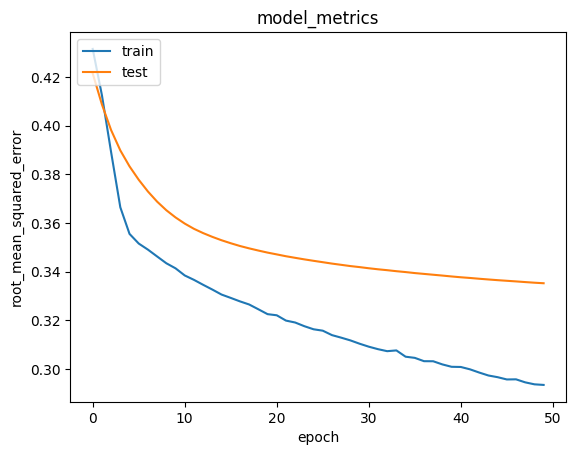

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()